<a href="https://colab.research.google.com/github/guifzy/Banco-C/blob/main/UnsupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

Neste documento, irei demonstrar os principais algoritmos de aprendizagem não supervisionada e algumas equações matematicas por trás destes algoritimos.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# K-Means

O algoritmo K-means é uma técnica de **clustering** usada para particionar um conjunto de dados em 𝑘 grupos distintos, onde 𝑘 é um parâmetro definido pelo usuário. Cada grupo é representado pelo centróide dos pontos de dados dentro desse grupo.

- **Centroide:** os primeiros centroides são selecionados aleatóriamente.
  - Os clusters são definidos a partir da distância euclidiana quadrática entre os pontos e os centroides: $$C_i = \text{arg}\min_{j} \|x_i - \mu_j\|^2$$
  - C é cluster atribuido ao grupo j
  - $μ$ é o centroide

Após definir todos clusters, o centroide é recalculado, onde buscamos a média de cada cluster e definimos como centroide:
$$\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i$$
- $μ$ é o novo centroide
- C são as ocorrências do cluster j
- A soma é feita sobre todos os pontos 𝑥 que foram atribuídos ao cluster 𝐶

>*O algoritmo converge quando os centróides não mudam significativamente após uma iteração, ou quando a variação dos centróides entre iterações é menor que um pequeno valor de tolerância.*

## Loss Function


O objetivo da dunção de curto é minimizar o máximo possível o valor de $J$:

$$J = \sum_{j=1}^{k} \sum_{x_i \in C_j} \|x_i - \mu_j\|^2$$

- É feito a soma de todas as distâncias de um determinado cluster, quanto menor for o resultado de J, melhor ajustado estão os centoides

>*O algoritmo K-means continuará iterando (atualizando centróides e reatribuindo pontos) até que não seja mais possível reduzir 𝐽 significativamente. Isso significa que o algoritmo atingiu um ponto onde os clusters são estáveis e bem definidos para os dados fornecidos.*

***OBS: A dimensionalidade dos cluster, aumentam de acordo com o número de colunas, para visualizar um scatterplot com mais de 3 dimensões, é comum escolher as labels mais relevantes para fazer o plot.***

In [ ]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X = df.drop('species', axis=1).values
y = df['species'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
modelo = KMeans(n_clusters=3)
modelo.fit(x_train)

labels = modelo.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
labels

array([0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1], dtype=int32)

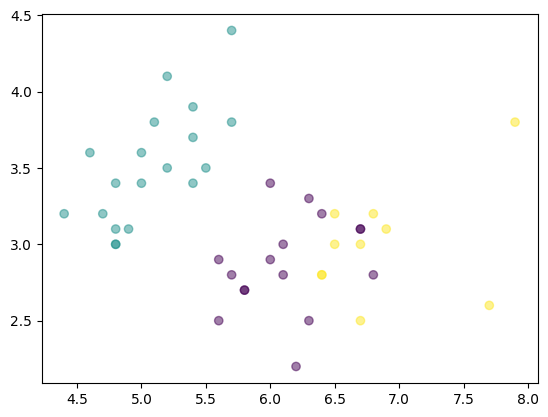

In [ ]:
from matplotlib import pyplot as plt

xs = x_test[:,0] # pega apenas uma amostra com as duas primeiras features
ys = x_test[:,1]

plt.scatter(xs, ys, c=labels, alpha=0.5)

In [ ]:
centroids = modelo.cluster_centers_
centroids

array([[5.79555556, 2.69555556, 4.34444444, 1.41777778],
       [4.96451613, 3.37741935, 1.46451613, 0.2483871 ],
       [6.85517241, 3.10344828, 5.70689655, 2.02068966]])

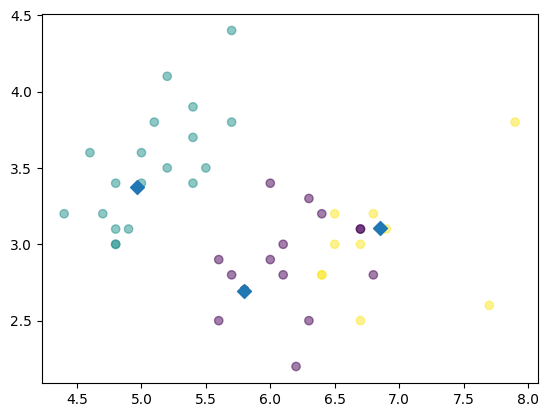

In [ ]:
xs = x_test[:,0]
ys = x_test[:,1]

plt.scatter(xs, ys, c=labels, alpha=0.5)

centroids_x = centroids[:,0] # pega apenas as duas primeiras features para plotar os centroides
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

# Métricas de Classificação

### CrossTabulation

Performa uma tabela que contem colunas com os valores reais do dataset, e linhas contendo os clusters selecionados pelo modelo.

In [ ]:
ct = pd.crosstab(labels, y_test) # vslores previstos e valores reais
ct

col_0,setosa,versicolor,virginica
row_0,,,
0,0,13,3
1,19,0,0
2,0,0,10


## Inércia

A também chamada de função de custo, inércia, serve para medir o quão próximos estão os clusters.

>Quanto menor a inércia, mais agrupados estão os pontos em cada cluster.

$$
I = \sum_{j=1}^{k} \sum_{x_i \in C_j}\sqrt{(x_i - C_j)^2}
$$

- É feito a soma de todas as distâncias de um determinado cluster, quanto menor for o resultado de $I$, melhor ajustado estão os centoides.

Esta métrica, além de servir para o ajuste dos parâmetros do modelo no treinamento, também é util para determinar o melhor número de clusters em nosso modelo.

- Quanto **maior** o número de **clusters**, **melhor a inércia** e **pior** a identificação correta de **novos pontos**.
- O melhor **TradeOff**, seria um ponto onde o valor da inércia começa a diminuir de forma lenta.

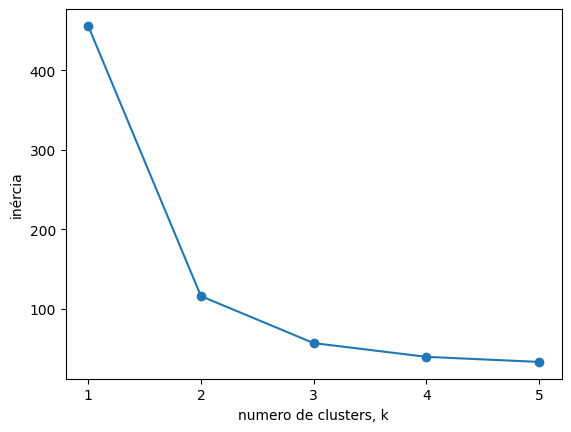

In [ ]:
ks = range(1, 6)
inercias = []

for k in ks:
    modelo = KMeans(n_clusters=k, n_init=10)

    modelo.fit(x_train)

    inercias.append(modelo.inertia_)

# Plot ks vs inertias
plt.plot(ks, inercias, '-o')
plt.xlabel('numero de clusters, k')
plt.ylabel('inércia')
plt.xticks(ks)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=3))
pipeline.fit(x_train)

labels = pipeline.predict(x_test)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 1, 0, 2, 0, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 0, 0, 1,
       1], dtype=int32)

In [ ]:
df = pd.DataFrame({'labels': labels, 'species': y_test})
ct = pd.crosstab(df['labels'], df['species'])
ct

species,setosa,versicolor,virginica
labels,,,
0,0,6,9
1,19,0,0
2,0,7,4


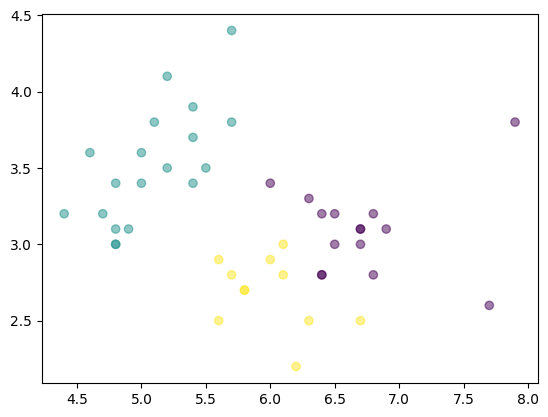

In [ ]:
xs = x_test[:,0] # pega apenas as duas primeiras features
ys = x_test[:,1]

plt.scatter(xs, ys, c=labels, alpha=0.5)

> As vezes, pela variância dos dados serem parecidas, não existe necessidade de padronizar os dados.

# Hierarquias

Consiste em **agrupas diferentes clusters** em um **grupo maior**, formando um gande cluster que contem os demais.

- Por exemplo, pequenos clusters contendo cidades, podem ser tornar um cluster maior que representa um país, que também pode formar um cluster ainda maior representando um continente ou região.

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Métodos de Ligação em Clustering Hierárquico

**1. Método de Ligação Simples (Single Linkage)**
- **Definição:** A distância entre dois clusters é definida como a menor distância entre qualquer ponto de um cluster e qualquer ponto do outro cluster.
- **Fórmula:**
  $$
  D_{\text{min}}(C_i, C_j) = \min \{d(x_a, x_b) \, | \, x_a \in C_i, \, x_b \in C_j\}
  $$
  Onde:
  - $C_i$ e $C_j$ são dois clusters.
  - $d(x_a, x_b)$ é a distância entre os pontos $x_a$ e $x_b$ pertencentes a $C_i$ e $C_j$, respectivamente.
- **Características:**
  - Tende a criar clusters alongados e propensos ao efeito "cadeia".
  - Pode conectar clusters com base em pontos extremos.
---
**2. Método de Ligação Completa (Complete Linkage)**
- **Definição:** A distância entre dois clusters é definida como a maior distância entre qualquer ponto de um cluster e qualquer ponto do outro cluster.
- **Fórmula:**
  $$
  D_{\text{max}}(C_i, C_j) = \max \{d(x_a, x_b) \, | \, x_a \in C_i, \, x_b \in C_j\}
  $$
  Onde:
  - $C_i$ e $C_j$ são dois clusters.
  - $d(x_a, x_b)$ é a distância entre os pontos $x_a$ e $x_b$ pertencentes a $C_i$ e $C_j$, respectivamente.
- **Características:**
  - Garante clusters mais compactos e esféricos.
  - É mais sensível a outliers.
---

**3. Método de Ligação Média (Average Linkage)**
- **Definição:** A distância entre dois clusters é a média das distâncias entre todos os pares de pontos (um de cada cluster).
- **Fórmula:**
  $$
  D_{\text{avg}}(C_i, C_j) = \frac{1}{|C_i| \cdot |C_j|} \sum_{x_a \in C_i} \sum_{x_b \in C_j} d(x_a, x_b)
  $$
  Onde:
  - $C_i$ e $C_j$ são dois clusters.
  - $|C_i|$ e $|C_j|$ são os tamanhos dos clusters $C_i$ e $C_j$, respectivamente.
  - $d(x_a, x_b)$ é a distância entre os pontos $x_a$ e $x_b$ pertencentes a $C_i$ e $C_j$, respectivamente.
- **Características:**
  - Compromisso entre os métodos de ligação simples e completa.
  - Produz clusters mais equilibrados.

>*Observações*

>- Existem outros metodos de ligação como **Ward, Centroid e Média ponderada;**
- A distância frequentemente utilizada nesses métodos é a **distância euclidiana**, que mede a distância em linha reta entre dois pontos no espaço.
- No entanto, outras métricas de distância, como a distância de Manhattan ou a distância de Mahalanobis, podem ser usadas dependendo do contexto.


In [ ]:
X = df.drop('species', axis=1).values
y = df['species'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

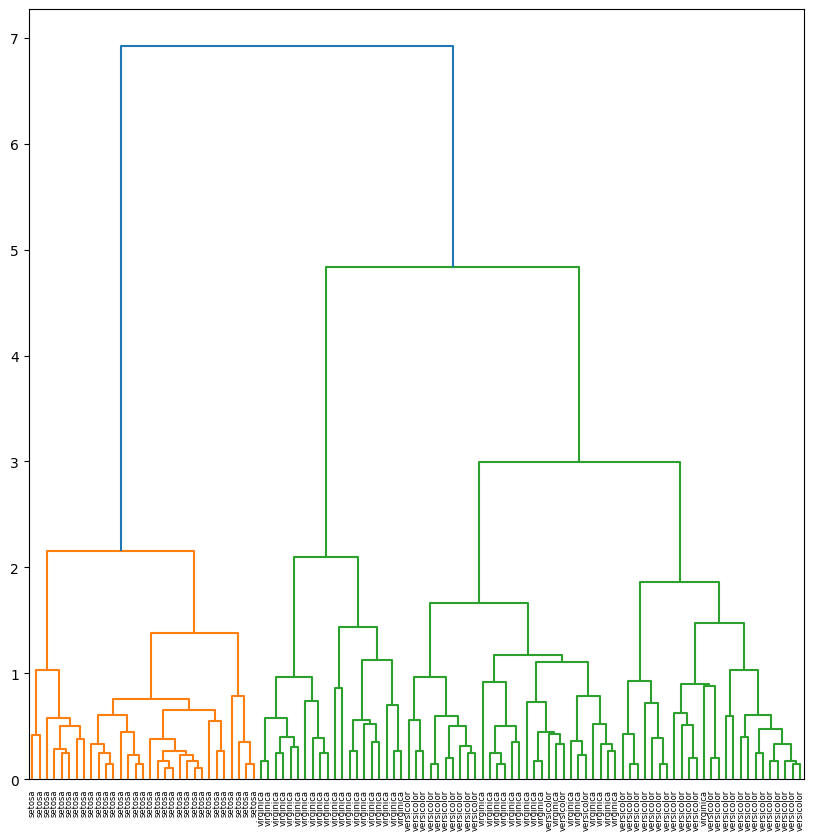

In [ ]:
mergings = linkage(x_train, method='complete')
plt.figure(figsize=(10, 10))
dendrogram(mergings,
           labels=y_train,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

## Definindo grupos hierárquicos

Dentro das hierarquias, é posspivel definir grandes clusters a partir de um ponto onde outros clusters menores se encontram.

>Esses grupos são formados a partir da **distância** entre eles, o que pode ser visualizado olhando o **eixo y** do gráfico Hierarquico.

Os critérios para formação de clusters variam em:
1. `'inconsistent'`
- **Descrição:**
  - Forma clusters com base na inconsistência das distâncias de ligação entre os clusters. A inconsistência é uma métrica que compara a distância de ligação de um par de clusters com a média das distâncias de ligação de seus predecessores na hierarquia.
  
- **Parâmetros:**
  - `t`: Define o limite de inconsistência. Todos os clusters com uma inconsistência menor que `t` serão formados.


- **Quando Usar:**
  - Esse critério é útil quando você deseja formar clusters com base em variações significativas nas distâncias de ligação. Por exemplo, se houver um aumento acentuado nas distâncias de ligação, ele pode indicar um corte natural na hierarquia.

---
2. `'distance'`
- **Descrição:**
  - Forma clusters cortando a árvore em um nível específico de distância. Todos os clusters terão uma distância máxima entre os pontos dentro do cluster menor ou igual ao valor de corte especificado.

- **Parâmetros:**
  - `t`: Define a distância máxima permitida entre os pontos dentro de um cluster.

- **Quando Usar:**
  - Esse critério é adequado quando você tem uma ideia de qual distância máxima entre os pontos é aceitável dentro de um cluster. Ele é especialmente útil se você deseja garantir que os clusters formados sejam compactos.
---
3. `'maxclust'`
- **Descrição:**
  - Corta a árvore hierárquica em um nível que resulta em um número máximo de clusters especificado. Esse é um critério direto para formar exatamente `t` clusters finais.

- **Parâmetros:**
  - `t`: Define o número máximo de clusters que devem ser formados.

- **Quando Usar:**
  - Esse critério é útil quando você já sabe quantos clusters deseja extrair dos dados. Ele garante que você terá exatamente `t` clusters, independentemente das distâncias ou inconsistências entre os clusters.


In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
labels = fcluster(mergings, 3, criterion='distance')

In [ ]:
pairs = pd.DataFrame({'labels': labels, 'species': y_train})
ct = pd.crosstab(pairs['labels'], pairs['species'])
ct

species,setosa,versicolor,virginica
labels,,,
1,31,0,0
2,0,0,20
3,0,37,17


# t-SNE

É um método de **redução de dimensionalidade**, ou seja, ele visa simplificar DataSets de **varias dimensões** para matrizes de **duas ou três dimensões**.

Para a redução, os pontos são distribuidos em uma curva normal, tendo um ponto em questão como média.

> A partir da dsitância entre o ponto de referência e os outros pontos, os mesmos são posicionados na curva ponderados por um desvio padrão.

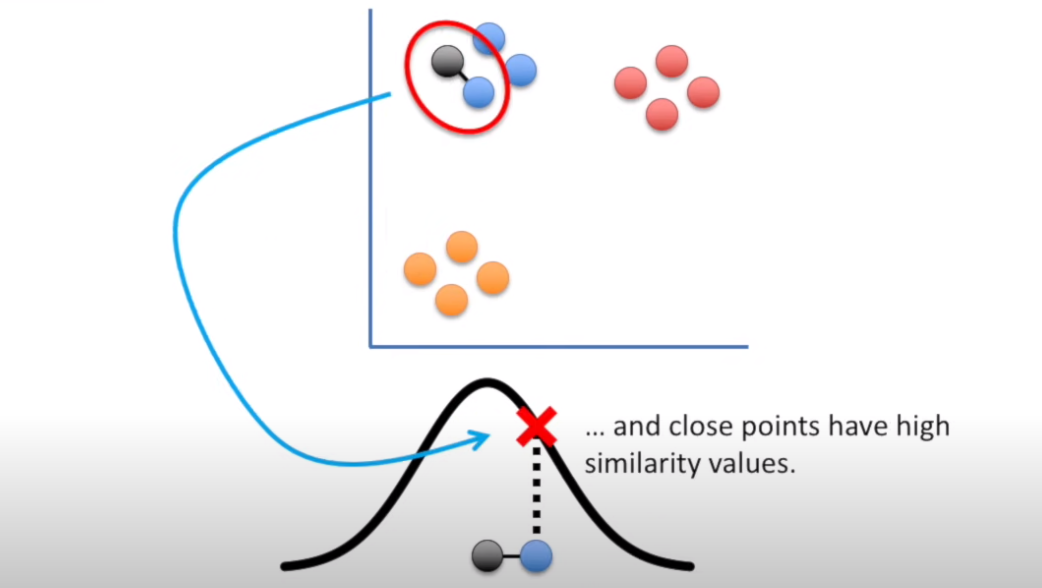

> Após a organização dos grupos em um plano de alta dimensão, a redução é feita a partir de uma curva t-student, e uma baixa significância, para assim encontrar a similaridade entre os pontos.

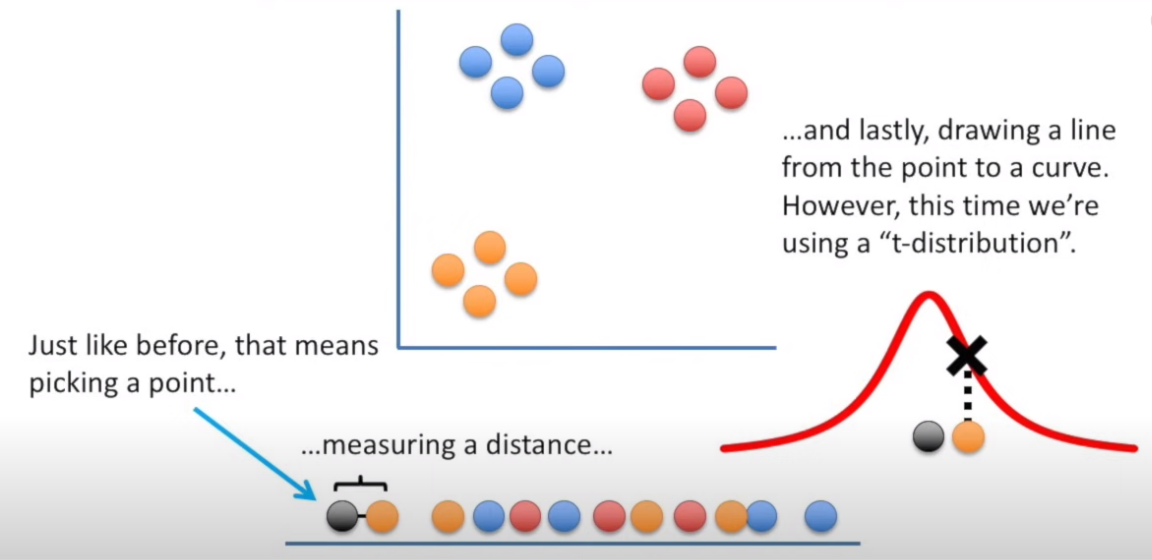

> O objetivo final, é conseguir uma distribuição próxima dos pontos formando clusters maiores e mais visiveis, que, quando equiparada com sua forma original em alta dimensionalidade, mantem seu significado preservado.

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

modelo = TSNE(learning_rate=500)
tsne_features = modelo.fit_transform(X)

print(tsne_features)

[[-6.57241135e+01 -8.79014435e+01]
 [-1.11570534e+02 -4.77319946e+01]
 [-1.53651642e+02  6.76091909e+00]
 [-1.43435730e+02 -5.12424850e+01]
 [-7.31406479e+01 -6.61858292e+01]
 [-3.26101341e+01 -1.22863022e+02]
 [-1.60564148e+02 -5.52632599e+01]
 [-9.87098999e+01 -7.94801178e+01]
 [-3.33105431e+01 -1.55914490e+02]
 [-1.14655891e+02 -6.27664757e+01]
 [-3.37057838e+01 -9.10918045e+01]
 [-1.57531784e+02 -2.97755165e+01]
 [-1.27236816e+02 -5.23133774e+01]
 [-1.48871979e+02 -3.45664749e+01]
 [ 5.87716252e-02 -8.87318573e+01]
 [ 4.14942837e+00 -1.09220695e+02]
 [-1.83144951e+01 -8.57435760e+01]
 [-6.12898750e+01 -7.47307968e+01]
 [-1.39910326e+01 -1.21445274e+02]
 [-4.64671478e+01 -1.10769691e+02]
 [-7.37602386e+01 -1.20556152e+02]
 [-6.17801323e+01 -1.06491257e+02]
 [-9.99896317e+01 -1.88535061e+01]
 [-1.07214760e+02 -1.12978577e+02]
 [-1.28171967e+02 -9.99629822e+01]
 [-1.18740440e+02 -7.85751572e+01]
 [-1.01780678e+02 -9.76695786e+01]
 [-7.54223404e+01 -9.89242935e+01]
 [-6.36631584e+01 -5

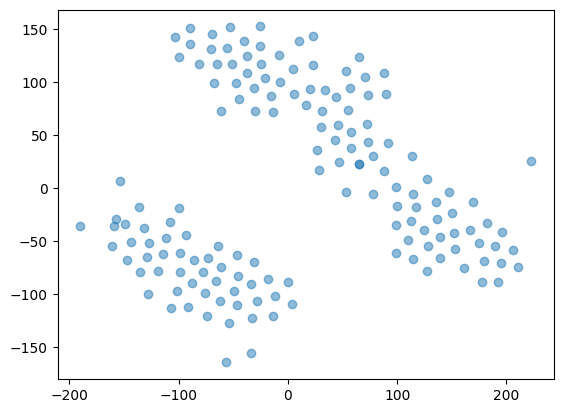

In [ ]:
xs = tsne_features[:,0]
ys = tsne_features[:,1]

plt.scatter(xs, ys, alpha=0.5,)
plt.show()

# PCA

A Análise de Componentes Principais (PCA) é uma técnica de redução de dimensionalidade que transforma os dados para um novo sistema de coordenadas, onde cada eixo (componente principal) captura a maior quantidade de variância possível.

- Para isso é utilizada uma técninca de decomposição de matrizes chamada **SVD**.

> SVD consiste em encontrar os vetores de direção(Eighenvector) de cada matriz, e a variação máxima para cada vetor(Eighenvalue), ou seja, o quanto aqueles pontos de distânciam da média.

PCA busca encontrar vetores que simplificam matrizes complexas, mas mantendo a significância dos dados atraves da variância:

- Primeiro a matriz é centralizada, por meio da distância média entre os pontos de cada coluna.
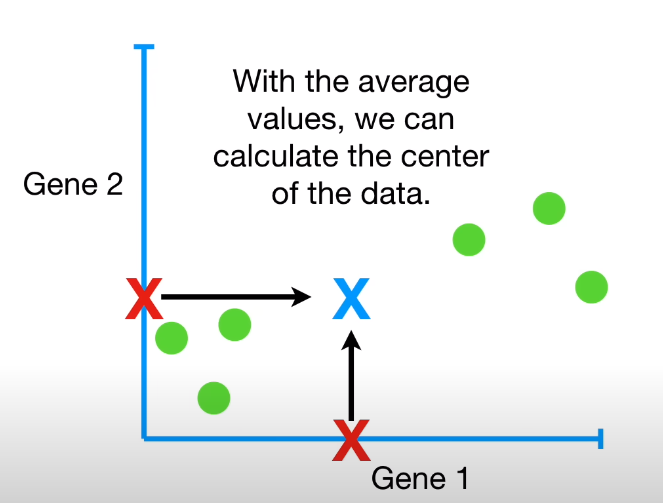

- Agora é calculado o vetor contendo a direção dos pontos de cada coluna, chamados $PC1, PC2, ... PCn$, esses vetores são chamados **Eighenvectors**. Dada uma matriz $X$, seus vetores de direção se dão por: $$X^TX$$

>Essa matriz irá conter o valor de $y$ para cada valor de $x$, o que nos possibilita o cálculo de sua direção.

> Cada caoluna da matriz, corresponde a um Componente Príncipal.

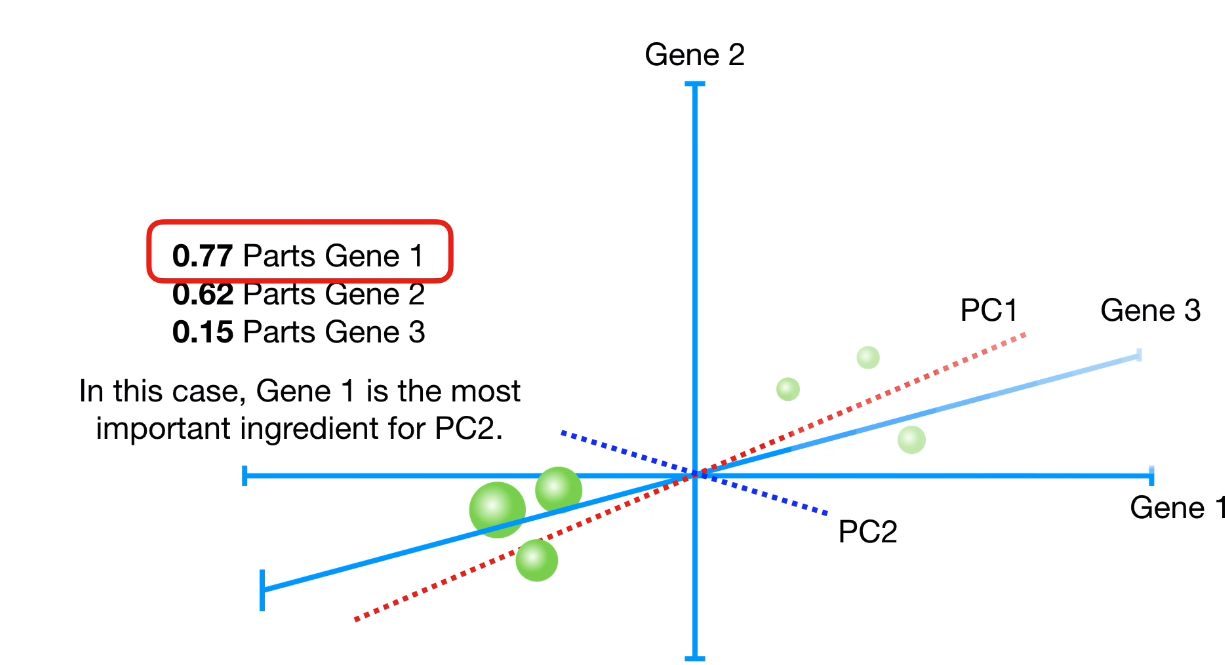

- Como medida para identificarmos, o quanto os Componentes Príncipais(PC1, PC2, etc) explicam a variância total dos dados, calculamos os Eighenvalues: $$\text{Variação PCs}=\frac{SS(\text{soma das distâncias}^2)}{n-1}$$
- *SS* é a soma das distâncias entre os pontos e o intercepto do gráfico.
- *n* é a quantidade de pontos

> Os eigenvalues contêm a variância máxima daquele Componente Príncipal

- A partir disso, podemos calcular o quanto cada componente princiapal explica a variância total dos dados:$$\text{Variação total}=VPC1 + VPC2 + ... + VPCn$$
$$\text{Variação total para PC1}=\frac{VPC1}{\text{Variação Total}}$$

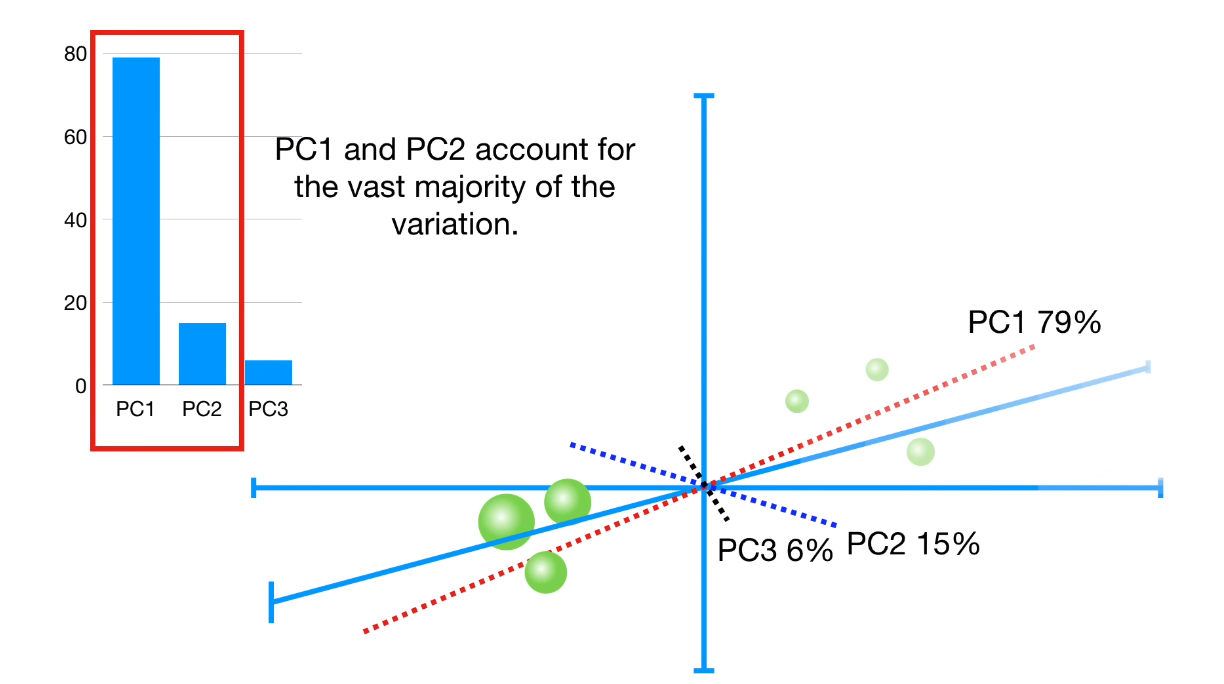

Componente PC1: 72.96%
Componente PC2: 22.85%
Componente PC3: 3.67%
Componente PC4: 0.52%


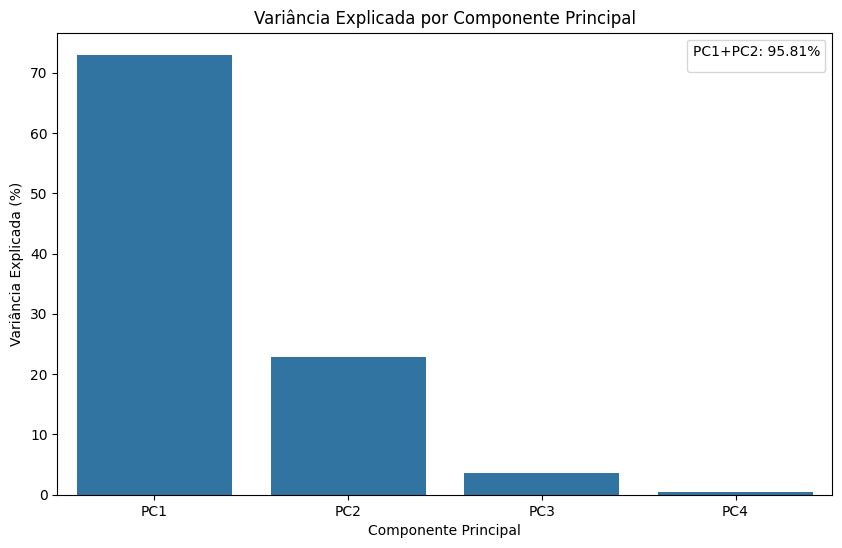

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

modelo = PCA(n_components=4)
scaler = StandardScaler()

x = scaler.fit_transform(X)
pca_features = modelo.fit_transform(x)

variancias = modelo.explained_variance_ratio_ * 100

for i, variancia in enumerate(variancias):
    print(f"Componente PC{i+1}: {variancia:.2f}%")

plt.figure(figsize=(10, 6))
sns.barplot(x=['PC1', 'PC2', 'PC3', 'PC4'], y=variancias)
plt.xlabel('Componente Principal')
plt.ylabel('Variância Explicada (%)')
plt.title('Variância Explicada por Componente Principal')
plt.legend(title=f"PC1+PC2: {(variancias[0]+variancias[1]):.2f}%")
plt.show()

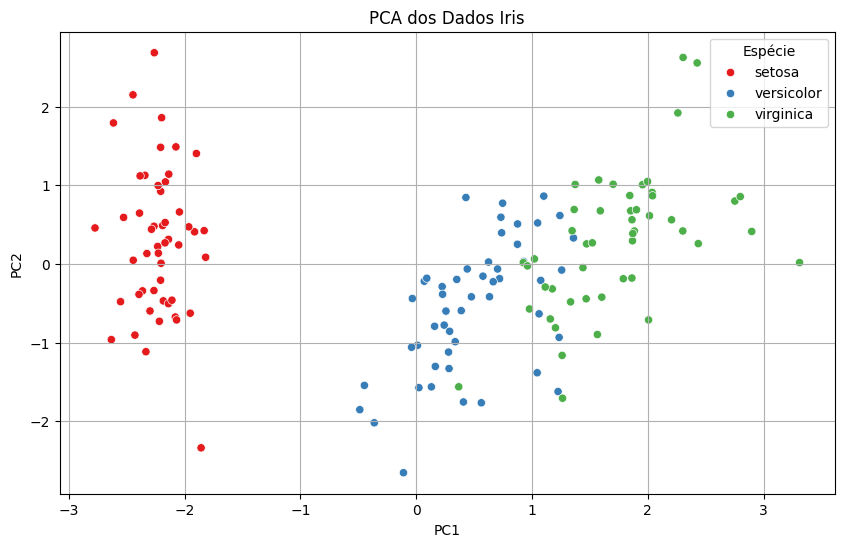

In [ ]:
df_pca = pd.DataFrame(data=pca_features[:,[0,1]], columns=['PC1', 'PC2'])
df_pca['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='Set1')
plt.title('PCA dos Dados Iris')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Espécie')
plt.grid(True)
plt.show()

# NMF

Também técnica para **redução de dimensionalidade**, onde, é criada uma matriz não negativa, que contem valores resultantes de uma **vetorização de matriz**, tendendo a conter valores próximos a matriz original, mantendo seu valor 'semântico'.

Dada uma matriz **V** de dimensão $ m \times n $ com elementos não-negativos (por exemplo, uma matriz TF-IDF), o objetivo da NMF é encontrar duas matrizes não-negativas:
- **W** de dimensão $ m \times k$
- **H** de dimensão $ k \times n $

$$
V \approx W \times H
$$


- **V** é a matriz original (por exemplo, uma matriz de documentos por termos).
- **W** é a matriz de "componentes" ou "tópicos".
- **H** é a matriz de coeficientes ou "ativação" que indica a força com que cada componente está presente em cada coluna da matriz original.
---
As matrizes **W** e **H** são restritas a terem valores não-negativos. Isso significa que cada elemento $ W_{ik} $ e $ H_{kj} $ deve ser maior ou igual a zero:

$
W_{ik} \geq 0 \quad \text{e} \quad H_{kj} \geq 0
$

Essa restrição garante que as combinações lineares representadas pelas matrizes mantêm uma interpretação física ou semântica.





- **W**: Cada linha de **W** representa uma base de componentes, ou seja, padrões ou tópicos que explicam os dados. Em análise de sentimentos, cada linha de **W** pode ser interpretada como um conjunto de palavras relacionadas a um determinado tema ou sentimento.
- **H**: Cada coluna de **H** mostra as combinações desses componentes para reconstruir a matriz original **V**. Em outras palavras, **H** indica a presença ou ativação dos componentes em cada documento ou observação.

## Função de Custo
O objetivo da NMF é minimizar a diferença entre a matriz original **V** e o produto das matrizes **W** e **H**. Isso pode ser expresso como uma função de custo, que mede o erro de aproximação. As duas funções de custo mais comuns são:

1. **Erro quadrático (Frobenius norm)**:
$$
\text{min} \quad ||V - W \times H||_F^2
$$
Aqui, $ ||\cdot||_F$ é a norma de Frobenius, que mede a soma dos quadrados das diferenças entre os elementos de $V$ e $W \times H$.

2. **Divergência de Kullback-Leibler**:
$$
\text{min} \quad D(V || W \times H) = \sum_{i,j} \left( V_{ij} \log \frac{V_{ij}}{(W \times H)_{ij}} - V_{ij} + (W \times H)_{ij} \right)
$$
Esta medida é comumente usada quando se trabalha com dados esparsos e não-negativos, como contagens de palavras em documentos.

Após a convergência do algoritmo, as matrizes **W** e **H** fornecem uma decomposição aproximada da matriz original **V**:

- **W**: Mostra as palavras mais representativas para cada componente ou tópico.
- **H**: Indica a contribuição de cada componente para cada documento ou observação.

In [8]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

documentos = [
    "comida boa e saudável",
    "excelente atendimento e comida saborosa",
    "atendimento ruim e comida sem gosto"
]

# Convertendo documentos para matriz TF-IDF
vectorizer = TfidfVectorizer()
V = vectorizer.fit_transform(documentos)

# Aplicando NMF
nmf = NMF(n_components=2, random_state=42)
W = nmf.fit_transform(V)
H = nmf.components_

print("Matriz V (TF-IDF):\n", V.toarray())
print()
print("Matriz W (componentes):\n", W)
print()
print("Matriz H (atividades):\n", H)
print()
# similaridade de cosseno entre documentos no espaço dos tópicos
similarity_matrix = cosine_similarity(W)

print("Similaridade entre documentos:\n", similarity_matrix)


Matriz V (TF-IDF):
 [[0.         0.65249088 0.38537163 0.         0.         0.
  0.         0.65249088 0.        ]
 [0.44451431 0.         0.34520502 0.5844829  0.         0.
  0.5844829  0.         0.        ]
 [0.38376993 0.         0.29803159 0.         0.50461134 0.50461134
  0.         0.         0.50461134]]

Matriz W (componentes):
 [[0.         0.81921986]
 [0.5281611  0.01035311]
 [0.53144269 0.        ]]

Matriz H (atividades):
 [[7.81502606e-01 0.00000000e+00 6.02324856e-01 5.49847422e-01
  4.77696725e-01 4.77696725e-01 5.49847422e-01 0.00000000e+00
  4.77696725e-01]
 [4.89793426e-04 7.96351161e-01 4.70755517e-01 4.53584631e-03
  0.00000000e+00 0.00000000e+00 4.53584631e-03 7.96351161e-01
  0.00000000e+00]]

Similaridade entre documentos:
 [[1.         0.01959841 0.        ]
 [0.01959841 1.         0.99980793]
 [0.         0.99980793 1.        ]]


- A `similarity_matrix` é uma matriz de similaridade que mede a similaridade entre cada par de **documentos**.
- Como $W$ tem 3 documentos, a `similarity_matrix` terá 3 linhas e 3 colunas, onde cada entrada $ (i, j) $ representa a similaridade entre o documento $ i $ e o documento $ j $.

$$
\text{similarity_matrix} =
\begin{pmatrix}
\text{sim}(D1, D1) & \text{sim}(D1, D2) & \text{sim}(D1, D3) \\
\text{sim}(D2, D1) & \text{sim}(D2, D2) & \text{sim}(D2, D3) \\
\text{sim}(D3, D1) & \text{sim}(D3, D2) & \text{sim}(D3, D3)
\end{pmatrix}
$$
